In [95]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [83]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [84]:
X_train[0].shape

(28, 28)

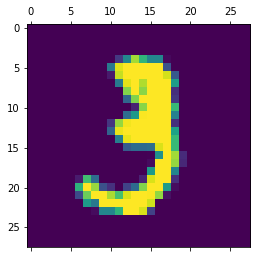

In [85]:
plt.matshow(X_train[10])

In [86]:
shape = X_train.shape

In [99]:
# first flattens the image from 28x28 to 784,1 and then gets it in 0-1 range
X_train_flat = (X_train.reshape(X_train.shape[0],(shape[1]*shape[2])))/255
X_test_flat = (X_test.reshape(X_test.shape[0],(shape[1]*shape[2])))/255

In [100]:
model = keras.models.Sequential()   #model that stacks layers
model.add(keras.Input(shape=784,))  #input layer shape
model.add(keras.layers.Dense(20,activation='relu'))  #adds a hidden layer with 20 nodes
model.add(keras.layers.Dense(10,activation='sigmoid'))  #adds the output layer with 10 nodes(bcz 0-9 digits)

In [103]:
model.output_shape

(None, 10)

In [89]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [90]:
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6640 - accuracy: 0.8134
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2404 - accuracy: 0.9302
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1864 - accuracy: 0.9460
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1624 - accuracy: 0.9527
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1453 - accuracy: 0.9583


In [91]:
model.evaluate(x=X_test_flat,y=y_test)

313/313 [==============================] - 0s 844us/step - loss: 0.1532 - accuracy: 0.9560


[0.15324631333351135, 0.9559999704360962]

In [92]:
predictions = model.predict(X_test_flat)

In [96]:
print('Model Predicted : ', np.argmax(predictions[1]), ' with probability : ', np.max(predictions[1]))

Model Predicted :  2  with probability :  0.9998535


Actual Answer...


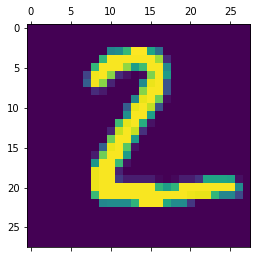

In [94]:
print('Actual Answer...')
plt.matshow(X_test[1])

In [98]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________
